In [1]:
import scipy.io
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
train_dir = './hands/training_dataset/training_data/'
image_dir = 'images/'
annot_dir = 'annotations/'

In [2]:
def coords_from_mat(mat_filepath):
    ''' 
    This extracts a rotated bbox from the .mat file
    '''
    mat = scipy.io.loadmat(mat_filepath)
    coords = []
    i = 0
    for box in mat['boxes'][0]:
        coords.append(list())
        c = 0
        for d in box[0][0]:
            if c > 3:
                break
            coords[i].append((d[0][0], d[0][1]))
            c += 1
        i += 1
    return coords

In [ ]:
# function to extract bounding boxes from an annotation file
def extract_boxes(filename):
    boxes = list()
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
        coors = [xmin, ymin, xmax, ymax]
        boxes.append(coors)
    # extract image dimensions
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height

In [20]:
ex_image = os.listdir(train_dir + image_dir)[0]

img_filename = os.listdir(train_dir + image_dir)[0]
ann_filename = train_dir +annot_dir +img_filename[:-4] +'.mat'

In [21]:
coords_from_mat(ann_filename)

[[(340.88588546793284, 317.2589744920444),
  (313.91803610069434, 315.9417423538337),
  (312.66313413991, 341.63349862623517),
  (339.6309835071485, 342.95073076444584)],
 [(226.65472181441544, 623.7092861267517),
  (229.87468995028996, 635.2692084969042),
  (256.2276311267607, 627.9287067047895),
  (253.00766299088616, 616.3687843346371)],
 [(247.70079438319215, 678.1495951321347),
  (248.9854801266116, 700.1120536133851),
  (280.3580291462194, 698.2769281653564),
  (279.07334340279994, 676.3144696841059)],
 [(212.68574828865448, 748.180765714358),
  (203.68680073095302, 707.156151848366),
  (153.49072229958043, 718.166904536538),
  (162.48966985728188, 759.19151840253)],
 [(258.1894725609103, 788.9658429985078),
  (281.16346861555996, 759.9624724136785),
  (235.9869980273246, 724.1775261771194),
  (213.01300197267494, 753.1808967619487)],
 [(348.6284728614119, 879.28279280372),
  (341.312703609176, 915.5523326443085),
  (377.7048604719211, 922.8928344364233),
  (385.020629724157, 886

In [23]:
mat = scipy.io.loadmat(ann_filename)
coords = []
i = 0

In [29]:
boxes = mat['boxes'][0]

In [82]:
def get_bbox(filename):
    mat = scipy.io.loadmat(filename)
    mat['boxes'][0]
    m_boxes = list()
    for i,box in enumerate(mat['boxes'][0]):
        tmp = list()
        box_coords = box[0][0]
        for j,coord in enumerate(box_coords):
            if j >3:
                break
            tmp.append(tuple(coord[0]))
        x_min = min([x_c for x_c,y_c in tmp])
        y_min = min([y_c for x_c,y_c in tmp])
        x_max = max([x_c for x_c,y_c in tmp])
        y_max = max([y_c for x_c,y_c in tmp])
        
        m_boxes.append([x_min,y_min,x_max,y_max])
    return m_boxes

In [86]:
# ex_image = os.listdir(train_dir + image_dir)[0]

# img_filename = os.listdir(train_dir + image_dir)[0]
# ann_filename = train_dir +annot_dir +img_filename[:-4] +'.mat'
for im in os.listdir(train_dir + image_dir):
    img_filename = train_dir +annot_dir +im
    ann_filename = train_dir +annot_dir +im[:-4] +'.mat'
    print(im)
    print(get_bbox(ann_filename))

Poselet_134.jpg
[[312.66313413991, 315.9417423538337, 340.88588546793284, 342.95073076444584], [226.65472181441544, 616.3687843346371, 256.2276311267607, 635.2692084969042], [247.70079438319215, 676.3144696841059, 280.3580291462194, 700.1120536133851], [153.49072229958043, 707.156151848366, 212.68574828865448, 759.19151840253], [213.01300197267494, 724.1775261771194, 281.16346861555996, 788.9658429985078], [341.312703609176, 879.28279280372, 385.020629724157, 922.8928344364233]]
Inria_336.jpg
[[377.7935005256426, 99.11467322825854, 432.61826418024, 141.88532677174146]]
Buffy_198.jpg
[[473.7000740466505, 192.50333209927325, 519.2999259533494, 220.49666790072672], [463.7257690620095, 319.903076248038, 530.2742309379905, 361.096923751962]]
VOC2010_521.jpg
[[91.76760645832391, 53.32254510568017, 239.466311670331, 165.49542724455023]]
VOC2007_356.jpg
[[163.7913265669552, 201.14340855099513, 201.58775840036498, 226.87272048126286]]
Poselet_241.jpg
[[407.8988492834253, 57.03789359604477, 533.

[[381.6516718168686, 186.2849138914166, 409.6375438694059, 218.98479937023214], [475.01113603337825, 485.96056289703887, 504.5035698489747, 520.3423044864737], [506.3599662969325, 570.4334108703785, 558.242974879538, 621.3246536457506], [475.68834735712835, 555.0530352838971, 523.1645938193421, 599.3878249311567]]
Buffy_410.jpg
[[399.16584713612644, 216.14294294208167, 454.9941528638736, 281.2970570579183], [394.3230439060494, 395.8330224449816, 443.1969560939506, 440.6469775550184]]
Buffy_213.jpg
[[436.24433492850613, 338.66849427944055, 499.7556650714939, 403.3315057205594], [428.1927754763181, 394.73092515877266, 466.807224523682, 442.2690748412273]]
VOC2010_977.jpg
[[230.00158915432814, 103.8839436155881, 273.2206330678941, 150.92020384984968], [258.1833811383307, 173.32325557710786, 374.796151025412, 294.17674442289206]]
VOC2010_1073.jpg
[[333.0058154058013, -3.297843731166516, 376.327517927532, 50.44479713618443], [330.16566311169373, 197.64659683505027, 379.78041531967875, 245.1

[[253.61098172031805, 168.30043995631124, 278.1929398483093, 184.27572491824074], [257.0773488877159, 228.3823563240803, 283.8180759488853, 244.8685397332674], [214.34155486024832, 235.5532644332832, 236.3381837018431, 257.02648467065944], [201.09884680718903, 268.1072395249835, 224.40442116666708, 292.90709739257915], [206.9241042836404, 349.0222165684357, 222.07589571635953, 362.9661346860446], [220.17478817980296, 374.9678405229296, 240.99514646071984, 383.51423833011705]]
Inria_74.jpg
[[265.1476146626864, 232.24253920596914, 362.5974833765295, 265.44832100908445], [118.55605617530412, 526.2071993578486, 179.07139480508837, 574.0266716098931]]
Inria_236.jpg
[[592.3513651397552, 165.95506996760224, 643.1584387818137, 194.0843565556952], [539.6514824437232, 230.50149105429864, 592.3289097131399, 281.7888315263464]]
Poselet_283.jpg
[[500.87339725962175, 187.49964255282813, 582.8275831325351, 259.4358413181396], [522.9431030663538, 438.5203936074949, 601.9294459532539, 480.0423304068420

FileNotFoundError: [Errno 2] No such file or directory: './hands/training_dataset/training_data/annotations/._.DS_S.mat'

In [69]:
[x_min,y_min,x_max,y_max]

(341.312703609176, 879.28279280372, 385.020629724157, 922.8928344364233)

In [112]:
img.shape[0]

768

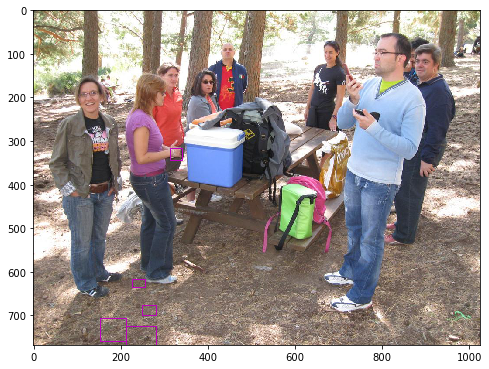

In [119]:
# im = np.random.choice(os.listdir(train_dir + image_dir))
im = os.listdir(train_dir + image_dir)[0]
img_filename = train_dir +image_dir + im
ann_filename = train_dir +annot_dir +im[:-4] +'.mat'


f, ax = plt.subplots(1,1,figsize=(8,8))
get_bbox(ann_filename)
img = cv2.imread(img_filename)
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
for box in get_bbox(ann_filename):
    x_min,y_min,x_max,y_max = box
    rect = patches.Rectangle((x_min,y_min),x_max-x_min,y_max-y_min,ec='m',fill=False)
    ax.add_patch(rect)
plt.show()

In [118]:
(x_min*img.shape[1],x_max*img.shape[1])

(320167.04935926787, 349067.1467191632)

In [121]:
y_min

879.28279280372

In [70]:
img = cv2.imread(img_file)

[(348.6284728614119, 879.28279280372),
 (341.312703609176, 915.5523326443085),
 (377.7048604719211, 922.8928344364233),
 (385.020629724157, 886.6232945958347)]

In [ ]:
for box in mat['boxes'][0]:
    coords.append(list())
    c = 0
    for d in box[0][0]:
        if c > 3:
            break
        coords[i].append((d[0][0], d[0][1]))
        c += 1
    i += 1
return coords

In [ ]:
class HandsDataset()